In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/User/Downloads/Student_Performance.csv")
df.sample(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9711,3,67,Yes,5,6,49.0
3812,5,89,No,5,7,74.0
1482,3,97,Yes,9,1,80.0
3386,9,86,No,5,2,79.0
7231,9,62,Yes,9,6,65.0


In [3]:
df.shape

(10000, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
df.duplicated().sum()

127

In [6]:
df.drop_duplicates(inplace=True)
df.shape

(9873, 6)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,9873.0,4.992100,2.589081,1.0,3.0,5.0,7.0,9.0
Previous Scores,9873.0,69.441102,17.325601,40.0,54.0,69.0,85.0,99.0
Sleep Hours,9873.0,6.531652,1.697683,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,9873.0,4.583004,2.867202,0.0,2.0,5.0,7.0,9.0
Performance Index,9873.0,55.216651,19.208570,10.0,40.0,55.0,70.0,100.0


In [8]:
df['Extracurricular Activities'].value_counts()

No     4986
Yes    4887
Name: Extracurricular Activities, dtype: int64

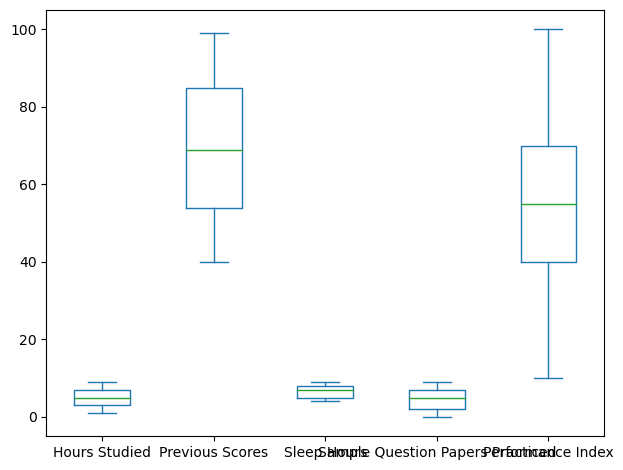

In [9]:
df.plot(kind='box')
plt.tight_layout()

In [10]:
df['ex_act'] = df['Extracurricular Activities'].apply(lambda x:1 if x=='Yes' else 0)

In [11]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,ex_act
0,7,99,Yes,9,1,91.0,1
1,4,82,No,4,2,65.0,0
2,8,51,Yes,7,2,45.0,1
3,5,52,Yes,5,2,36.0,1
4,7,75,No,8,5,66.0,0


In [12]:
df.drop(columns=['Extracurricular Activities'],inplace=True)

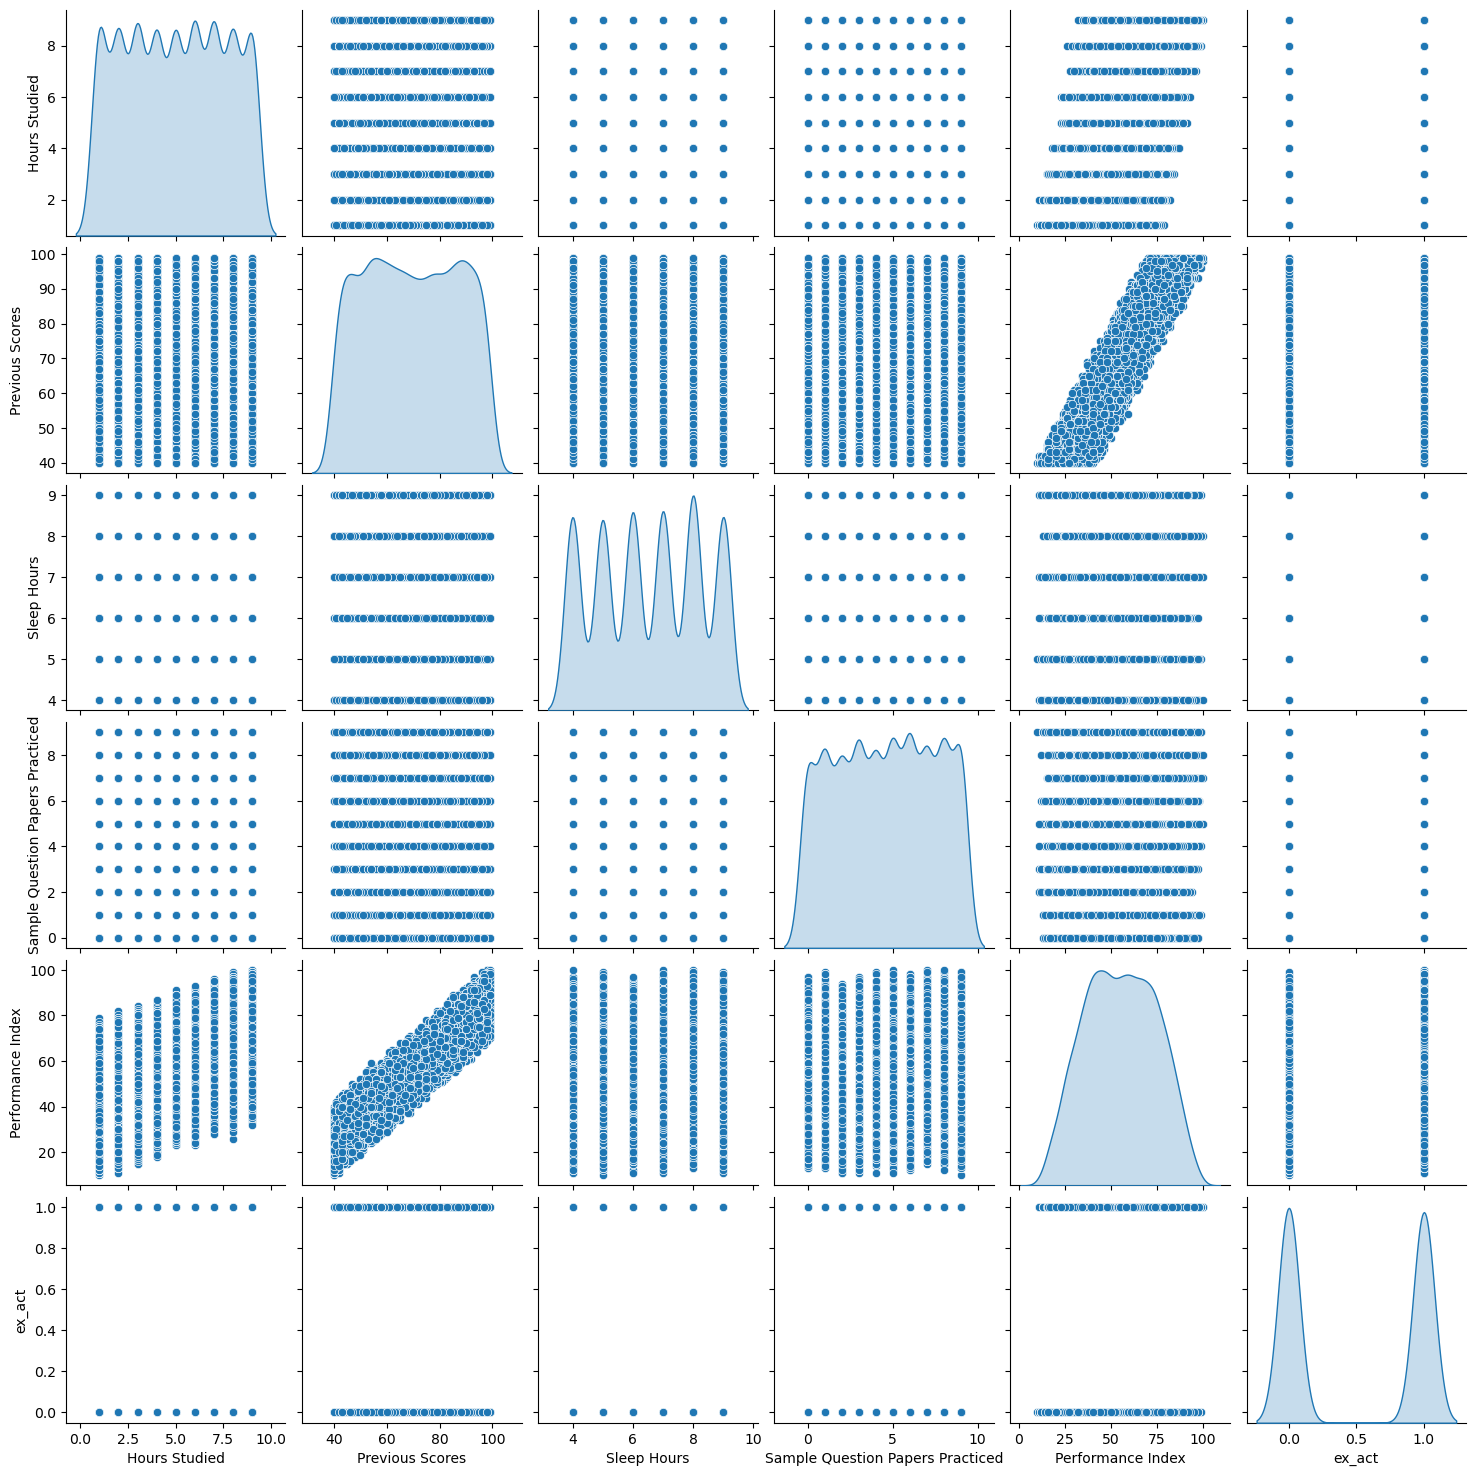

In [14]:
sns.pairplot(df,diag_kind='kde')

In [15]:
x = df.drop(columns=['Performance Index'])
y = df['Performance Index']

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [17]:
xtrain1,xtest1,ytrain1,ytest1 = train_test_split(x,y,random_state=98,test_size=0.3)

# LinearRegression

In [18]:
lr1 = LinearRegression()
lr1.fit(xtrain1,ytrain1)
ypred1 = lr1.predict(xtest1)
print("coeffs: ",lr1.coef_)
print("intercept: ",lr1.intercept_)
print("MSE: ",mean_squared_error(ytest1,ypred1))
print('MAE: ',mean_absolute_error(ytest1,ypred1))
print('R2: ',r2_score(ytest1,ypred1))

coeffs:  [2.85705001 1.01808105 0.48185254 0.20012887 0.57557025]
intercept:  -34.095499922970035
MSE:  4.264508170732721
MAE:  1.648176384787822
R2:  0.9882683951260405


In [19]:
df.corr()['Performance Index']

Hours Studied                       0.375332
Previous Scores                     0.915135
Sleep Hours                         0.050352
Sample Question Papers Practiced    0.043436
Performance Index                   1.000000
ex_act                              0.026075
Name: Performance Index, dtype: float64

In [20]:
x1 = df['Previous Scores']
y1 = df['Performance Index']

In [21]:
xtrain2,xtest2,ytrain2,ytest2 = train_test_split(x1,y1,random_state=48,test_size=0.3)

In [22]:
lr2 = LinearRegression()
lr2.fit(xtrain2.values.reshape(-1,1),ytrain2)
ypred2 = lr2.predict(xtest2.values.reshape(-1,1))
print("coeffs: ",lr2.coef_)
print("intercept: ",lr2.intercept_)
print("MSE: ",mean_squared_error(ytest2,ypred2))
print('MAE: ',mean_absolute_error(ytest2,ypred2))
print('R2: ',r2_score(ytest2,ypred2))

coeffs:  [1.01466038]
intercept:  -15.268459139500308
MSE:  61.289726523345685
MAE:  6.6991627168684165
R2:  0.8336437909433202


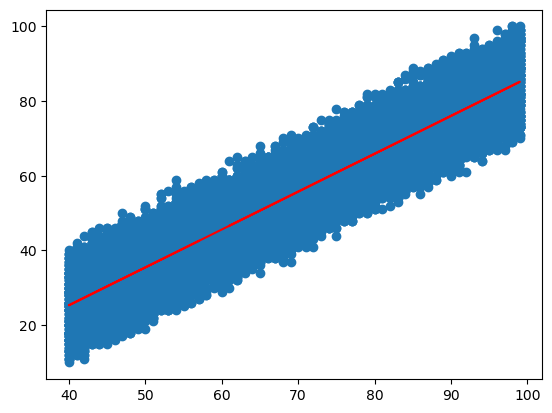

In [23]:
plt.scatter(x=df['Previous Scores'],y=df['Performance Index'])
plt.plot(xtest2.values,ypred2,'r-')

# SGDRegressor

In [24]:
from sklearn.linear_model import SGDRegressor

In [26]:
from sklearn.preprocessing import StandardScaler
trf1 = ColumnTransformer(transformers=[
    ('scaling',StandardScaler(),xtrain1.columns)
],remainder='passthrough')
xtrf1 = trf1.fit_transform(xtrain1)
xtst1 = trf1.transform(xtest1)

In [27]:
sg = SGDRegressor()
sg.fit(xtrf1,ytrain1)
ypred3 = sg.predict(xtst1)
print("coeffs: ",sg.coef_)
print("intercept: ",sg.intercept_)
print("MSE: ",mean_squared_error(ytest1,ypred3))
print('MAE: ',mean_absolute_error(ytest1,ypred3))
print('R2: ',r2_score(ytest1,ypred3))

coeffs:  [ 7.38562391 17.71933786  0.83812901  0.5514975   0.32082303]
intercept:  [55.2129672]
MSE:  4.259454002739221
MAE:  1.6469369611530786
R2:  0.988282299074513


In [30]:
sg1 = SGDRegressor(penalty='l2')
sg1.fit(xtrf1,ytrain1)
ypred3 = sg.predict(xtst1)
print("coeffs: ",sg1.coef_)
print("intercept: ",sg1.intercept_)
print("MSE: ",mean_squared_error(ytest1,ypred3))
print('MAE: ',mean_absolute_error(ytest1,ypred3))
print('R2: ',r2_score(ytest1,ypred3))

coeffs:  [ 7.3453908  17.65377291  0.83929461  0.56966377  0.28269891]
intercept:  [55.19770721]
MSE:  4.259454002739221
MAE:  1.6469369611530786
R2:  0.988282299074513


# Ridge Regression

In [32]:
from sklearn.linear_model import Ridge
rg = Ridge()
rg.fit(xtrf1,ytrain1)
ypred3 = rg.predict(xtst1)
print("coeffs: ",rg.coef_)
print("intercept: ",rg.intercept_)
print("MSE: ",mean_squared_error(ytest1,ypred3))
print('MAE: ',mean_absolute_error(ytest1,ypred3))
print('R2: ',r2_score(ytest1,ypred3))

coeffs:  [ 7.38870907 17.69385077  0.81549762  0.57222242  0.28777068]
intercept:  55.20199681666908
MSE:  4.264502358336823
MAE:  1.648136995815095
R2:  0.9882684111158638


In [40]:
rg1 = Ridge(alpha=0.01,max_iter=10)
rg1.fit(xtrf1,ytrain1)
ypred3 = rg1.predict(xtst1)
print("coeffs: ",rg1.coef_)
print("intercept: ",rg1.intercept_)
print("MSE: ",mean_squared_error(ytest1,ypred3))
print('MAE: ',mean_absolute_error(ytest1,ypred3))
print('R2: ',r2_score(ytest1,ypred3))

coeffs:  [ 7.38979146 17.69639461  0.81559419  0.57224717  0.28778498]
intercept:  55.20199681666908
MSE:  4.264508037312166
MAE:  1.6481759908418425
R2:  0.9882683954930787


In [58]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha=1,max_iter=1000)
ls.fit(xtrf1,ytrain1)
ypred3 = ls.predict(xtst1)
print("coeffs: ",ls.coef_)
print("intercept: ",ls.intercept_)
print("MSE: ",mean_squared_error(ytest1,ypred3))
print('MAE: ',mean_absolute_error(ytest1,ypred3))
print('R2: ',r2_score(ytest1,ypred3))

coeffs:  [ 6.39109402 16.70468498  0.          0.          0.        ]
intercept:  55.20199681666908
MSE:  7.242524641190077
MAE:  2.152178332400453
R2:  0.9800759116928228
